## Time Series Functions for Sequencing

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df[['date', 'T_out', 'RH_2', 'Appliances', 'lights']].head(5)

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40


In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a689e410>,
      dtype=object)

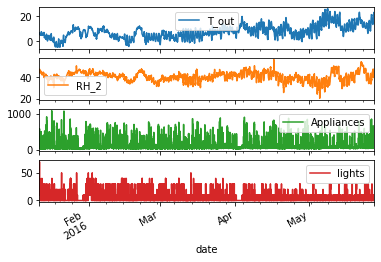

In [6]:
df.set_index('date')[['T_out', 'RH_2', 'Appliances', 'lights']].plot(subplots=True)

In [7]:
features = df[['T_out', 'RH_2', 'Appliances', 'lights']].to_numpy().tolist()
target = df['Appliances'].tolist()

In [8]:
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [9]:
features[0:11]

[[6.6, 44.79, 60.0, 30.0],
 [6.48333333333333, 44.7225, 60.0, 30.0],
 [6.36666666666667, 44.6266666666667, 50.0, 30.0],
 [6.25, 44.59, 50.0, 40.0],
 [6.133333333333329, 44.53, 60.0, 40.0],
 [6.01666666666667, 44.5, 50.0, 40.0],
 [5.9, 44.5, 60.0, 50.0],
 [5.91666666666667, 44.5, 60.0, 50.0],
 [5.93333333333333, 44.4333333333333, 60.0, 40.0],
 [5.95, 44.4, 70.0, 40.0],
 [5.96666666666667, 44.4, 230.0, 70.0]]

In [10]:
target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [11]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)


In [12]:
ts_generator[0]

(array([[[ 6.6       , 44.79      , 60.        , 30.        ],
         [ 6.48333333, 44.7225    , 60.        , 30.        ],
         [ 6.36666667, 44.62666667, 50.        , 30.        ],
         [ 6.25      , 44.59      , 50.        , 40.        ],
         [ 6.13333333, 44.53      , 60.        , 40.        ],
         [ 6.01666667, 44.5       , 50.        , 40.        ]]]), array([60]))

In [13]:
len(ts_generator)

19729

In [14]:
multi_target = pd.concat([df['Appliances'], df['Appliances'].shift(-1), df['Appliances'].shift(-2)], axis=1).dropna().to_numpy().tolist()

In [15]:
multi_target[0:10]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0]]

In [16]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

# Deep Learning Model

# LSTM:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a6924a50>,
      dtype=object)

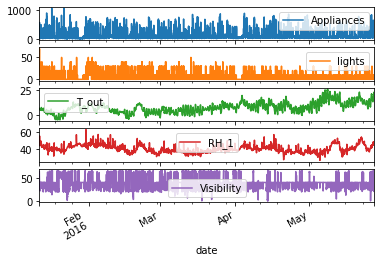

In [17]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [18]:
df_input = df[['Appliances', 'T_out', 'RH_1', 'Visibility']]

In [19]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [20]:
df_input.query("Appliances > 500")

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [21]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

Best Practice is to apply scaler on train data and then apply on test/cv data

In [22]:
features=  data_scaled
target=data_scaled[:,0]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [24]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)


In [25]:
import tensorflow as tf

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
471/471 [==============================] - 189s 331ms/step - loss: 0.0120 - mean_absolute_error: 0.0635 - val_loss: 0.0061 - val_mean_absolute_error: 0.0553
Epoch 2/50
471/471 [==============================] - 155s 328ms/step - loss: 0.0087 - mean_absolute_error: 0.0504 - val_loss: 0.0048 - val_mean_absolute_error: 0.0434
Epoch 3/50
471/471 [==============================] - 155s 329ms/step - loss: 0.0063 - mean_absolute_error: 0.0411 - val_loss: 0.0037 - val_mean_absolute_error: 0.0387
Epoch 4/50
471/471 [==============================] - 153s 326ms/step - loss: 0.0049 - mean_absolute_error: 0.0354 - val_loss: 0.0032 - val_mean_absolute_error: 0.0285
Epoch 5/50
130/471 [=======>......................] - ETA: 1:43 - loss: 0.0056 - mean_absolute_error: 0.0378

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

In [ ]:
predictions = model.predict_generator(test_generator)

In [ ]:
predictions.shape[0]

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length])], axis=1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final['App_Pred'] = rev_trans[:,0]

In [ ]:
df_final[['Appliances', 'App_Pred']].plot()

# Deep Autoregressive: 

uses RNN for multiple time series scenario. 

Magnitude of time series changes vastly. Develops one single global model.

In [ ]:
!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install glutonts